In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA


## Loading the dataset

In [14]:
dataset = pd.read_csv("Student_Performance.csv")
pd.set_option('display.max_columns', None)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


## Preprocessing using get_dummies()

In [15]:
X = dataset[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours",
             "Sample Question Papers Practiced"]].copy()

y = dataset[["Performance Index"]]

dummies = pd.get_dummies(X["Extracurricular Activities"], prefix='Extracurricular Activities')
dummies = dummies.astype(int)
X.drop("Extracurricular Activities", axis=1, inplace=True)

X = pd.concat([X, dummies], axis=1)

# X = np.array(X.values)
# y = np.array(y.values).flatten()

print(X)
print(y)


      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Extracurricular Activities_No  \
0                                    1                              0   
1                                    2                              1   
2                                    2                              0   
3                                    2                              0  

## Visualizing Data

(10000, 1)


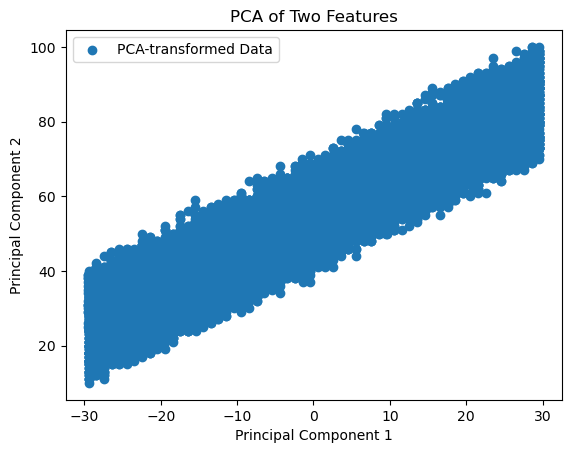

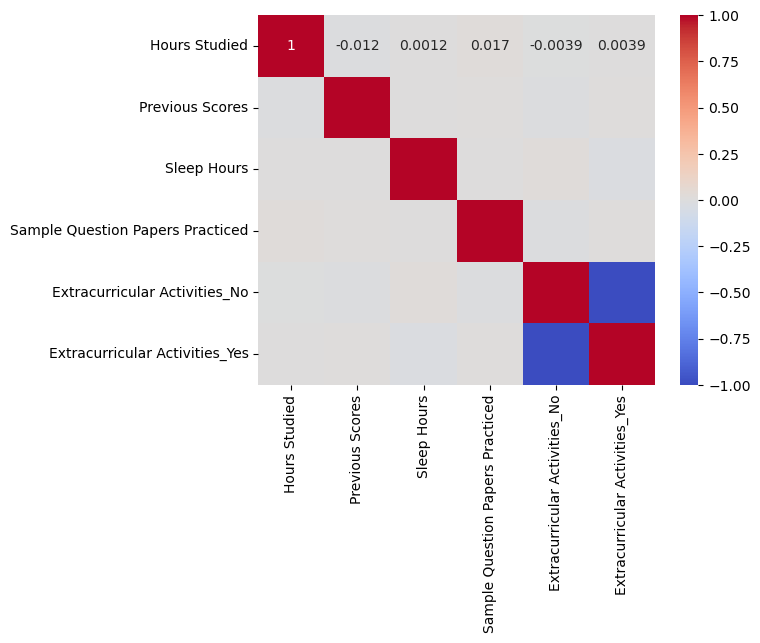

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=1, random_state=42)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
print(X_pca.shape)

# Plot the data in the PCA space (first two principal components)
plt.scatter(X_pca, y, label='PCA-transformed Data')

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Two Features')

# Display legend
plt.legend()

# Show the plot
plt.show()


corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



## Preprocessing using LableEncoder()

In [17]:
X = dataset[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours",
             "Sample Question Papers Practiced"]].copy()

y = dataset[["Performance Index"]]


encoder = LabelEncoder()
X["Extracurricular Activities"] = encoder.fit_transform(X["Extracurricular Activities"])

print(X)
print(y)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

## Splitting data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
regressor = LinearRegression()

## Training The regressor

In [19]:
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.9889832909573145


## Training using StandardScaler()

In [20]:
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


regressor.fit(X_scaled_train, y_train)
print(regressor.score(X_scaled_test, y_test))

0.9889832909573145


## Using L1 regularization (Lasso)

In [21]:
model = Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

kf = KFold(n_splits=8, shuffle=True, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print(best_model.score(X_test, y_test))

{'alpha': 0.001}
0.9889829436529366


## Using L2 regularization (Ridge)

In [22]:
model = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

kf = KFold(n_splits=8, shuffle=True, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print(best_model.score(X_test, y_test))

{'alpha': 1.0}
0.9889832645273239
